<a href="https://colab.research.google.com/github/DimitriosK/Credit-Score/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Credit score classification

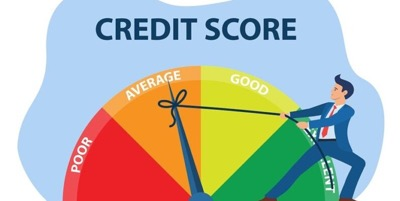

by Olena Bugaiova and Dimitrios Karslidis

### Problem statement
* Over the years, a global finance company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts
* Given a person’s credit-related information, build a machine learning model that can classify the credit score
*   We downloaded the data [Credit Score Classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) from Kaggle

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import re
import missingno
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,precision_score,\
confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth',None)
%matplotlib inline
plt.style.use('seaborn')


### Gather Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Assess the data
* Print the number of rows and columns of the dataframe `df`.
* Select randomly 5 rows of the dataframe `df` and then print them.
* Check for:
  * missing and duplicated rows
  * the types of the feautres
* Some columns have missing values that pandas does not recognize:
  * `Occupation` has as value this character '_______'
  * `Changed_Credit_Limit` has as value this character '_'

In [ ]:
rows,columns=df.shape #The dataframs has 28 columns and 10000 rows
print(f'The number of rows is {rows} and the number of columns is {columns}')

The number of rows is 100000 and the number of columns is 28


In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
#print the number of missing values in each column
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
#The column Occupation has missing values denoted by ('_______'). Pandas does not recognize
df.Occupation.value_counts().index


Index(['_______', 'Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object')

In [ ]:
#The column Changed_Credit_Limit has missing values denoted by ('_'). Pandas 
#does not recognize them
df.Changed_Credit_Limit.value_counts().index

Index(['_', '8.22', '11.5', '11.32', '7.35', '10.06', '8.23', '11.49', '7.69',
       '9.25',
       ...
       '30.1', '23.97', '31.04', '-0.31999999999999995', '-1.91', '-1.84',
       '0.8899999999999999', '28.06', '1.5599999999999996', '21.17'],
      dtype='object', length=4384)

In [ ]:
#print the number of duplicated rows
duplicated_rows=df.duplicated().sum()
print(f'The number of dupllicated rows is {duplicated_rows}')

The number of dupllicated rows is 0


In [ ]:
#columns with numeric entries sush as Age and Annual Income for example 
#has strings values. Such columns will need to be converted into numerical types
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### Cleaning data
* Copy the dataframe `df` and call the copied version as `df_clean`
* Drop the columns: `ID`,`Name`,`SSN`
* Replace the characters that pandas does not recognize them as missing values with np.nan:
  * `Occupation` has as a value this character '_______'. Replace it with np.nan.
  * `Changed_Credit_Limit` has as value this character '_'. Replace it with np.nan.
  * `Credit_Mix` has a value this character '_'. Replace it with np.nan
* 'NM' value in the column `Payment_of_Min_Amount` can be treated as No
* Clean the columns: 
  * Remove  the unnesessary underscores from columns whose values are numbers. One such example is `Amount_invested_monthly`, where we have `__10000__`. Another example of a column with similar problems is`Num_of_Loan`. 
  * `Type_of_Loan` has a value which is called 'Not Specified'. However, we will not treat it as a missing value.
  * `Credit_History_Age`. Express the values of this column in terms of months.
  
* Change the data type for the features:
  * `Annual_Income`,`Age`,`Num_of_Loan`,`Num_of_Delayed_Payment`,`Changed_Credit_Limit`,`Outstanding_Debt`, `Amount_invested_monthly`,`Monthly_Balance`,`Credit_History_Age`
* Check again the number of missing values for each column after completed the above steps. Count the number of rows that have missing values.

* Copy the dataframe

In [ ]:
#copy the dataframe df and call it by df_clean
df_clean=df.copy()

* Drop the columns `ID`, `Name`, `SSN`

In [ ]:
#Drop the columns that we will not use for our analysis
def drop_columns(data,columns):
  return data.drop(columns=columns)
columns=['ID','Name','SSN']
df_clean=drop_columns(df_clean,columns)

In [ ]:
#Test whether the specified columns have been dropped
columns=['ID','Name','SSN']
for column in columns:
  assert column not in df_clean.columns, f'The column {column} has not been removed'
print("Passed the test")

Passed the test


* Replace all the characters that pandas does not recognize them as missing values with np.nan.

In [ ]:
#Replace the characters that Pandas does not recognize them as
# missing values with np.nan
def chars_to_nan(data,columns,to_replace):
  data[columns]=data[columns].replace(to_replace,np.nan)
  return data
df_clean=chars_to_nan(df_clean,['Occupation'],'_______')
df_clean=chars_to_nan(df_clean,['Changed_Credit_Limit','Credit_Mix'],'_')
df_clean=chars_to_nan(df_clean,['Payment_Behaviour'],'!@9#%8')

* Replace 'NM' in `Payment_of_Min_Amount` with 'No'

In [ ]:
df_clean['Payment_of_Min_Amount'].value_counts(normalize=True)

Yes    0.52326
No     0.35667
NM     0.12007
Name: Payment_of_Min_Amount, dtype: float64

In [ ]:
df_clean['Payment_of_Min_Amount']=df_clean['Payment_of_Min_Amount'].replace('NM','No')

* Remove unnesessary underscores.

In [ ]:
#Remove underscores attaches to numbers from columns descibed below
def remove_underscores(data,columns):
  data[columns]=data[columns]\
  .apply(lambda x: (x.str.findall('[-]?\d+[.]?\d*')).str[0])
  return data
columns=['Annual_Income','Age','Num_of_Loan','Num_of_Delayed_Payment',
      'Changed_Credit_Limit','Outstanding_Debt', 
      'Amount_invested_monthly','Monthly_Balance']
df_clean=remove_underscores(df_clean,columns)

In [ ]:
#Test whether the specified columns=['Amount_invested_monthly','Num_of_Loan']
#contain underscores
columns=['Annual_Income','Age','Num_of_Loan','Num_of_Delayed_Payment',
      'Changed_Credit_Limit','Outstanding_Debt', 
      'Amount_invested_monthly','Monthly_Balance']
num_of_uderscores=0
for col in columns:
  num_of_uderscores+=df_clean[col].str.contains('_').sum()
if num_of_uderscores==0:
  print('Test passed')
else:
  print('Test did not pass')

Test passed


* Express the values of `Credit_Hisotry_Age` in terms of the same unit (months)

In [ ]:
#Express the values in the column Credit_History_Age in terms of number of months
def to_months(x):
  if not isinstance(x,np.float):
    if len(x)>1:
      return int(x[0])*12+int(x[1])
    else:
       return int(x[0])*12
  else:
   return  x
df_clean.Credit_History_Age=df_clean.Credit_History_Age.str.findall('\d+')\
.apply(to_months)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Test whether the column Credit_History_Age has numbers now.
df_clean.Credit_History_Age.head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64



* Below we compute how many records have 'Not Specified' type of loans.

In [ ]:
#Compute how many records have 'Not Specified' loans
index_not_na=~df_clean['Type_of_Loan'].isna()
new_index=df_clean.loc[index_not_na,'Type_of_Loan'].str.contains('Not Specified')
not_specified=df_clean.loc[index_not_na,'Type_of_Loan'].loc[new_index]
print(f"The number of 'Not Specified' loans is {not_specified.shape[0]} ")
print('\n')
print('Sample dataframe of "Not Specified" loans')
print(not_specified.head())



The number of 'Not Specified' loans is 31680 


Sample dataframe of "Not Specified" loans
16    Auto Loan, Auto Loan, and Not Specified
17    Auto Loan, Auto Loan, and Not Specified
18    Auto Loan, Auto Loan, and Not Specified
19    Auto Loan, Auto Loan, and Not Specified
20    Auto Loan, Auto Loan, and Not Specified
Name: Type_of_Loan, dtype: object


* Let's compute how many records have 
 **only** 'Non Specified' type of loan.

In [ ]:
not_specified=df_clean.loc[index_not_na,'Type_of_Loan'].loc[new_index]
idx=(not_specified.str.split(',').str.len()==1)
print(f"The number of records with only 'Not Specified' type \
of loan is {not_specified.loc[idx].shape[0]}")
print('\n')
print("Sample of records with 'Not Specified' type of loan:")
print(not_specified.loc[idx].head(5))

The number of records with only 'Not Specified' type of loan is 1408


Sample of records with 'Not Specified' type of loan:
24    Not Specified
25    Not Specified
26    Not Specified
27    Not Specified
28    Not Specified
Name: Type_of_Loan, dtype: object


**Comment.** 31680 loans out of (10000-#missing values=98592) loans are of 'Not Specified' types. 1408 records have only 'Not Specified' type. It is tempting to consider 'Not Specified' as a missing value but we will not take this path since almost 40% of records are of 'Not Specified type'. It must cary some specific meaning.

* Convert the types of some columns (described below) to numerical ones.

In [ ]:
#Change the dtypes of some columns (described below) from object 
#to 'float' for example
def cast(data,columns,dtype='float'):
  data[columns]=data[columns].astype(dtype)
  return data

cols=['Annual_Income','Age','Num_of_Loan','Num_of_Delayed_Payment',
      'Changed_Credit_Limit','Outstanding_Debt', 
      'Amount_invested_monthly','Monthly_Balance','Credit_History_Age']
df_clean=cast(df_clean,cols)


* Check the number of missing values again.

In [ ]:
#Number of missing values
num_na=df_clean.isna().any(axis=1).sum()/df_clean.shape[0]*100
print(f'{int(num_na)}% of rows have missing values !')

60% of rows have missing values !


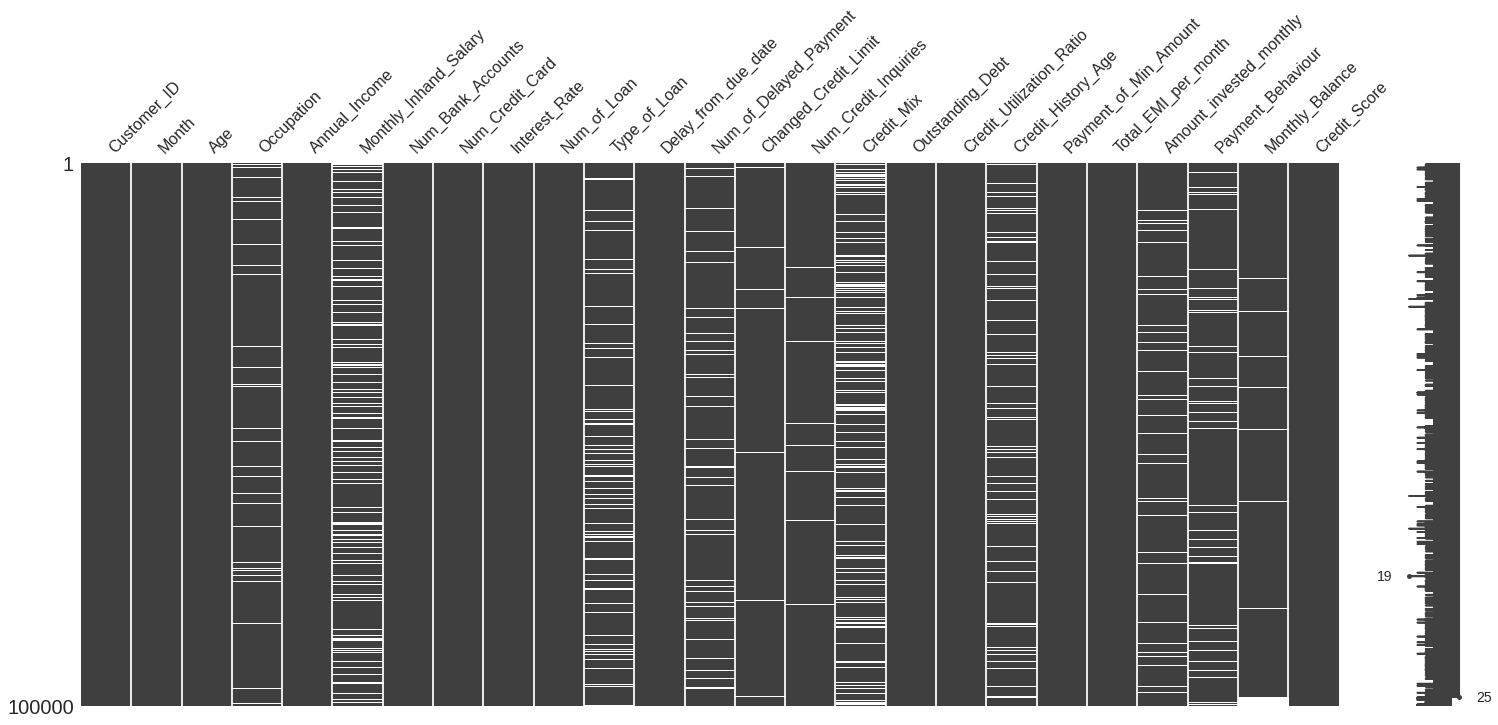

In [ ]:
missingno.matrix(df_clean);

* The result above confirms that deleting all the rows that have missing values is not a good idea.
* Before we proceed to impute the columns with missing values, let's  visualize our data first.

### Visualize Data
  * Univariate distributions:
    * Check the distribution of `Credit_Score`
    * Use a histogram for numerical features   to see whether  their distributiions are skewed or not.
    
  * Bivariate distributions:
    * Check which numerical features could possibly affect `Credit_Score`
    * Check whether the numerical features are correlated to each other.

In [ ]:
#find numerical and categorical features
#Create a dataframe with nuumerical or categorical features only
mask=df_clean.dtypes=='object'
cat_cols=df_clean.columns[mask]#categorical columns
num_cols=df_clean.columns[~mask] #numerical columns
df_num=df_clean[num_cols]
df_cat=df_clean[cat_cols]

* **Univariate Distributions**

* Distribution of `Credit_Score`

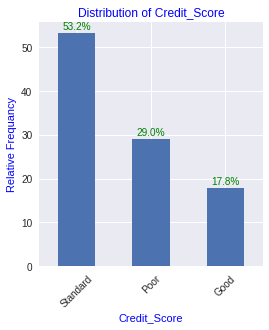

In [ ]:

plt.figure(figsize=(4,4.5))
rel_freq=df_clean['Credit_Score'].value_counts(normalize=True,ascending=False)*100
rel_freq.plot(kind='bar',rot=45)
for i in range(rel_freq.shape[0]):
    plt.text(i,rel_freq.iloc[i]+0.5,str(round(rel_freq.iloc[i],1))+"%",
             ha="center",va="bottom",color="g")
plt.ylabel('Relative Frequancy',color='blue')
plt.xlabel('Credit_Score',color='blue')
plt.title('Distribution of Credit_Score',color='blue');

* **Conclusion** `Credit_Score` is imbalanced.

* Create the function called `make_hist_log` to visualize some numerical features before and after the log transformation is appplied to them.

In [ ]:
def make_hist_log(data,column,bin_1,bin_2):
  fig,ax=plt.subplots(1,2,figsize=(9,4))
  dic={0:'before',1:'after'}
  log={0:False,1:True}
  bins=[bin_1,bin_2]
  for i in range(2):
    sns.histplot(data,x=column,
                 log_scale=log[i],bins=bins[i],ax=ax[i])
    ax[i].set_title(f'Distribution of {column} \n {dic[i]} log transformation',
                    color='blue')
    ax[i].set_xlabel(f"{column}",color='blue')
    ax[i].set_ylabel(f"Frequency of {column}",color='blue')
  plt.subplots_adjust(wspace=0.5)




* Visualize `Annual_Inome` before and after a log transformation is applied.

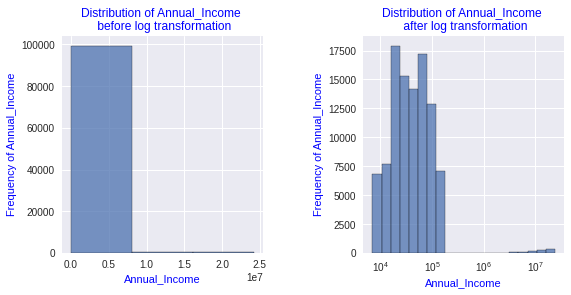

In [ ]:
make_hist_log(data=df_clean,column='Annual_Income',bin_1=3,bin_2=20)

* Visulaize `Monthly_Inhand_Salary` before and after a log transformation is applied.

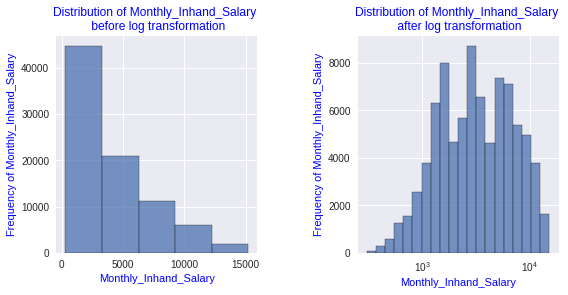

In [ ]:
make_hist_log(df_clean,'Monthly_Inhand_Salary',5,20)

* Visualize `Monthly_Balance` before and after a log transformation is applied.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


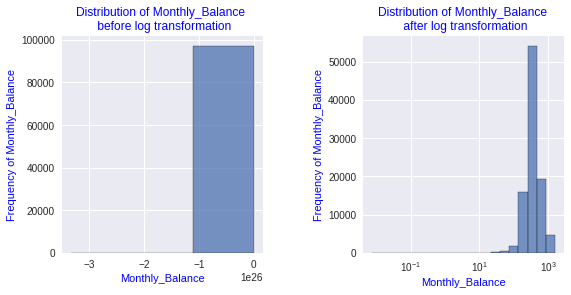

In [ ]:
make_hist_log(df_clean,'Monthly_Balance',3,20);

* **Conclusion**. The above plots clearly indicate that some features are highly skewed. After applying a log transofrmation they become more symmetrical.


* We already know that a log transformation cannot be applied to features that have negative values or zeros. This situation can be fixed by applying [Yeo-Johnson transformation](https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/) which is an extension of log transformation. The scikit-learn library privides us with this transfromation.

* Visualize `Amount_invested_monhly` before and after applying Yeo-Johnson transformation.

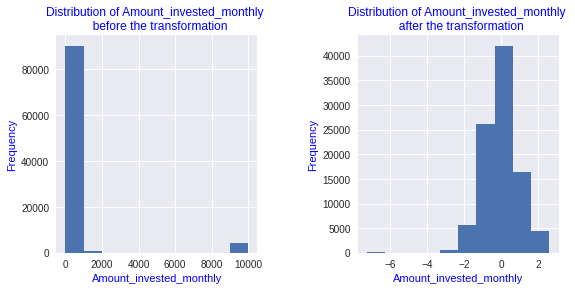

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].hist(df_clean['Amount_invested_monthly'],bins=10)
ax[0].set_title('Distribution of Amount_invested_monthly \n \
 before the transformation',color='blue')
ax[0].set_xlabel('Amount_invested_monthly',color='blue')
ax[0].set_ylabel('Frequency',color='blue')
transformer=PowerTransformer()
new_feature=transformer.fit_transform(df_clean[['Amount_invested_monthly']])
ax[1].hist(new_feature,bins=10)
ax[1].set_title('Distribution of Amount_invested_monthly \n \
 after the transformation',color='blue')
ax[1].set_xlabel('Amount_invested_monthly',color='blue')
ax[1].set_ylabel('Frequency',color='blue')
plt.subplots_adjust(wspace=0.5)

* **Conclusion.** The feature `Amount_invested_monthly` becomes more symmetric after applying Yeo-Johnson transformation

* **Biavariate Distributions**

* Let's check the relationship between `Cedit_Score` and `Num_of_Loan`.

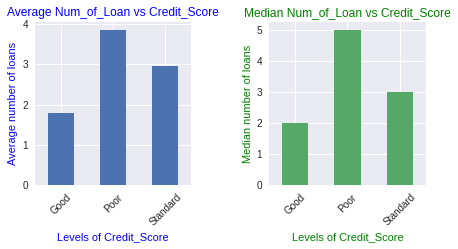

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(7,3))
df_clean.groupby(by=['Credit_Score']).agg({'Num_of_Loan':[np.mean,np.median]})\
.plot(kind='bar',subplots=True,legend=False,ax=ax,rot=45)
ax[0].set_ylabel('Average number of loans',color='blue')
ax[0].set_xlabel('Levels of Credit_Score',color='blue')
ax[0].set_title('Average Num_of_Loan vs Credit_Score',color='blue')
ax[1].set_ylabel('Median number of loans',color='green')
ax[1].set_xlabel('Levels of Credit_Score',color='green')
ax[1].set_title('Median Num_of_Loan vs Credit_Score',color='green')
plt.subplots_adjust(wspace=0.5)

* **Conclusion.** `Num_of_loans` might affect `credit_score`

* Check if `Monthly_Inhand_Salary` and `Monthly_Balance` related to `Credit_Score` using a boxplot and a pointplot respectively

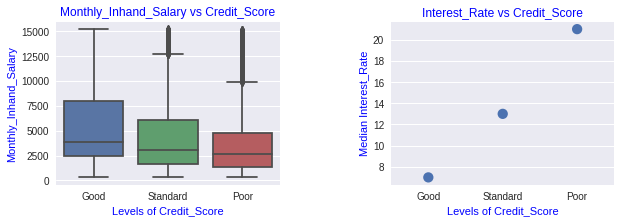

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.boxplot(data=df_clean,y='Monthly_Inhand_Salary',x='Credit_Score'
               ,ax=ax[0])
ax[0].set_title('Monthly_Inhand_Salary vs Credit_Score',color='blue')
ax[0].set_xlabel('Levels of Credit_Score',color='blue')
ax[0].set_ylabel('Monthly_Inhand_Salary',color='blue')

sns.pointplot(data=df_clean,y='Interest_Rate',x='Credit_Score',ax=ax[1],
              join=False,estimator=np.median)
ax[1].set_title('Interest_Rate vs Credit_Score',color='blue')
ax[1].set_ylabel('Median Interest_Rate',color='blue')
ax[1].set_xlabel('Levels of Credit_Score',color='blue')
plt.subplots_adjust(wspace=0.5)

* **Conclusion.** There is a clear relationship between `Interest_Rate` and `Credit_Score`

* Let's check if numerical features related to each other. Since we have many of them, we will choose only few: `'Annual_Income`,`Outstanding_Debt`,`Monthly_Inhand_Salary`,
`Amount_invested_monthly`.
  * We will use sns.pairplot() to visualize the relationshipss.
  * Then we will use heatmap to confirm whether the features related linearly or not.

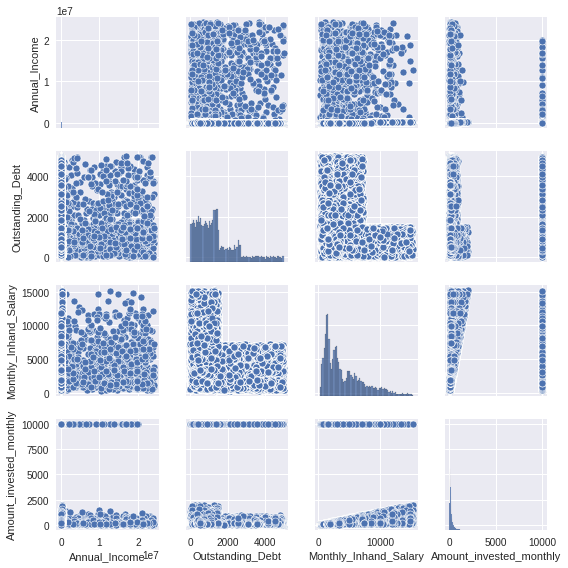

In [ ]:
vars=['Annual_Income','Outstanding_Debt','Monthly_Inhand_Salary',
      'Amount_invested_monthly']
sns.pairplot(data=df_clean,vars=vars,height=2);

* **Conclusion.** It seems that there is no linear relationships between the aforementioned features.
* The heatmap below confirms this observation.

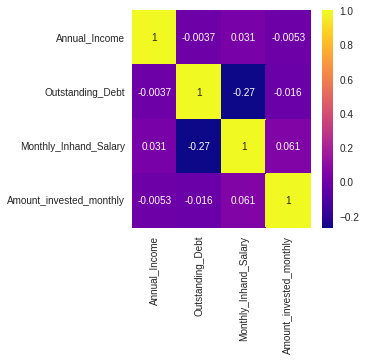

In [ ]:
plt.figure(figsize=(4,4))
cor=df_clean[vars].corr()
sns.heatmap(cor,annot=True,cmap='plasma')

### Dealing with missing values

**Categorical Features**

* We will impute the categorical features using Customers_IDs. Note that the Customer_ID's here come in groups of 8, i.e., each distinct one appears only 8 times. This is confirmed below.

In [ ]:
num=(df_clean['Customer_ID'].value_counts()!=8).sum() #counts how many times each distinct 
#Customer_ID appears more than 8 times or less than 8 times.

print(f"The number of times each Customer_ID appears \
different from 8 times is {num}")

cust_index=df_clean['Customer_ID'].value_counts().index
print("An example of a group  of 8 of Customer_IDs ")
print('\n')
df_clean.set_index('Customer_ID').loc[cust_index[0],['Age','Month','Occupation','Credit_Score']]

The number of times each Customer_ID appears different from 8 times is 0
An example of a group  of 8 of Customer_IDs 




,Age,Month,Occupation,Credit_Score
Customer_ID,,,,
CUS_0xd40,23.0,January,Scientist,Good
CUS_0xd40,23.0,February,Scientist,Good
CUS_0xd40,-500.0,March,Scientist,Good
CUS_0xd40,23.0,April,Scientist,Good
CUS_0xd40,23.0,May,Scientist,Good
CUS_0xd40,23.0,June,Scientist,Good
CUS_0xd40,23.0,July,Scientist,Good
CUS_0xd40,23.0,August,Scientist,Standard


* The imputation of missing values of categorical features will be accomplished in two steps.
  * **Step 1.** Use bfill parameter of the method pd.DataFrame.fillna(method='bfill') to impute the missing values with the values from the next row
  * **Step 2.** Use ffill parameter of the method pd.DataFrame.fillna(method='ffill') to impute the missing values with the values from the previous row
*  We have created the function `inpute_cat` to accomplish this task.

In [ ]:
def impute_cat(data,column):
  #Step 1-->Use bfill: Look at the values of the next row
  indices=data[column].isna()
  cust_ids=data.loc[indices]['Customer_ID'].values
  cust_ids=np.unique(cust_ids)
  for cust in cust_ids:
     #bfill within each customer_id group
     mask=df_clean['Customer_ID']==cust
     data.loc[mask,column]=data.loc[mask,column].fillna(method='bfill')
#Check the number of missing values in column after step 1
  num=data[column].isna().sum()
  print(f'# of missing values in {column} after step 1 is {num}')
  if num==0:
    print('The imputing process is finished !')
    return data
    #step 2--> Use ffill:Look for the value of the prefious row
  else:
    indices=data[column].isna()
    cust_ids=df_clean.loc[indices]['Customer_ID'].values
    cust_ids=np.unique(cust_ids)
    for cust in cust_ids:
      mask=data['Customer_ID']==cust
      data.loc[mask,column]=data.loc[mask,column].fillna(method='ffill')
  #Check the number of missing values in column after step 2
    num=data[column].isna().sum()
    print(f'# of missing values in {column} after step 2 is {num}')
    return data


* Extract categorical features that have missing values.

In [ ]:
mask=df_clean.select_dtypes(include='object').isna().sum()>0
cat_cols_na=df_clean.select_dtypes(include='object').isna().sum().loc[mask].index
for col in cat_cols_na:
  print(f"The feature {col} has missing values")

The feature Occupation has missing values
The feature Type_of_Loan has missing values
The feature Credit_Mix has missing values
The feature Payment_Behaviour has missing values


* **Occupation**

In [ ]:
df_clean['Occupation']=df_clean['Occupation'].str.strip()
df_clean=impute_cat(df_clean,'Occupation')

# of missing values in Occupation after step 1 is 935
# of missing values in Occupation after step 2 is 0


* **Type_of_Loan**

In [ ]:
df_clean['Type_of_Loan']=df_clean['Type_of_Loan'].str.strip()
df_clean=impute_cat(df_clean,'Type_of_Loan')

# of missing values in Type_of_Loan after step 1 is 11408
# of missing values in Type_of_Loan after step 2 is 11408


* It seems that there are customer_ids in `Type_of_Loan`, for which each entry is Nan.
One such example is given below.

In [ ]:
indices=df_clean["Type_of_Loan"].isna()
df_clean.loc[indices,['Customer_ID','Type_of_Loan']].head(8)

,Customer_ID,Type_of_Loan
32,CUS_0x1cdb,NaN
33,CUS_0x1cdb,NaN
34,CUS_0x1cdb,NaN
35,CUS_0x1cdb,NaN
36,CUS_0x1cdb,NaN
37,CUS_0x1cdb,NaN
38,CUS_0x1cdb,NaN
39,CUS_0x1cdb,NaN


* We will impute the missing values in `Type_of_Loan` with 'Not Specified' value

In [ ]:
indices=df_clean["Type_of_Loan"].isna()
df_clean.loc[indices,'Type_of_Loan']='Not Specified'

In [ ]:
null_values=df_clean['Type_of_Loan'].isna().sum()
print(f'The number of missing values in Type_of_Loan is {null_values}')

The number of missing values in Type_of_Loan is 0


**Credit_Mix**

In [ ]:
df_clean['Credit_Mix']=df_clean['Credit_Mix'].str.strip()
df_clean=impute_cat(df_clean,'Credit_Mix')

# of missing values in Credit_Mix after step 1 is 3242
# of missing values in Credit_Mix after step 2 is 0


**Payment_Behaviour**

In [ ]:
df_clean['Payment_Behaviour']=df_clean['Payment_Behaviour'].str.strip()
df_clean=impute_cat(df_clean,'Payment_Behaviour')

# of missing values in Payment_Behaviour after step 1 is 1077
# of missing values in Payment_Behaviour after step 2 is 0


**Numerical Features**


* Extract the numerical features that have missing values.

In [ ]:
mask=df_clean.select_dtypes(exclude='object').isna().sum()>0
num_cols_na=df_clean.select_dtypes(exclude='object').isna().sum().loc[mask].index
for col in num_cols_na:
  print(f"The feature {col} has missing values")

The feature Monthly_Inhand_Salary has missing values
The feature Num_of_Delayed_Payment has missing values
The feature Changed_Credit_Limit has missing values
The feature Num_Credit_Inquiries has missing values
The feature Credit_History_Age has missing values
The feature Amount_invested_monthly has missing values
The feature Monthly_Balance has missing values


* The imputation of numerical features `Credit_History_Age` and `Monthly_Balance` will be treated separately.
* The remaining numerical features will be treated in the same way:
  * **Step 1.** We will impute the nan values by the average of two numbers surrounding the Nan value. We have created the function `impute_average` to help us with this task.
  * **Step 2.** Otherwise use parameter 'bfill' or 'ffill' of pd.DataFrame.fillna()
  * The Steps 1 and 2 are included in the function `impute_num`

In [ ]:
def impute_average(data,mask,column):
  for i in range(1,len(data.loc[mask,column])-1):
    cond1=not math.isnan(data.loc[mask,column].iloc[i-1])
    cond2=not math.isnan(data.loc[mask,column].iloc[i+1])
    cond3=math.isnan(data.loc[mask,column].iloc[i])
    if (cond1 and cond2) and cond3:
      data.loc[mask,column].iloc[i]=(data.loc[mask,column].iloc[i-1]+data.loc[mask,column].iloc[i+1])/2
  return data





In [ ]:
def impute_num(data,column):
  #step 1--> use impute average
  indices=data[column].isna()
  cust_ids=data.loc[indices]['Customer_ID'].unique()
  for cust in cust_ids:
     mask=df_clean['Customer_ID']==cust
     data=impute_average(data,mask,column)
  #Check the number of missing values in column after step 1
  num=data[column].isna().sum()
  print(f'# of missing values in {column} after step 1 is {num}')
  if num==0:
    print('The imputing process is finished!')
    return data
  #step 2--> use bfill
  else: 
    indices=data[column].isna()
    cust_ids=data.loc[indices]['Customer_ID'].unique()
    #bfill within each customer_id group
    for cust in cust_ids:
      mask=data['Customer_ID']==cust
      data.loc[mask,column]=data.loc[mask,column].fillna(method='bfill')
  #Check the number of missing values in column after step 2 bfill
    num=data[column].isna().sum()
    print(f'# of missing values in {column} after step 2 (bfill) is {num}')
    if num==0: #checking if we need to proceed to the next step
      return data
    #step 2--> use ffill
    else:
      indices=data[column].isna()
      cust_ids=data.loc[indices]['Customer_ID'].unique()
      #ffill within each customer_id group
      for cust in cust_ids:
        mask=data['Customer_ID']==cust
        data.loc[mask,column]=data.loc[mask,column].fillna(method='ffill')
  #Check the number of missing values in column after step 2 ffill
      num=data[column].isna().sum()
      print(f'# of missing values in {column} after step 2 (ffill) is {num}')
      return data


  
  

**Monthly_Inhand_Salary**


In [ ]:
df_clean['Monthly_Inhand_Salary'].describe([.25, .5, .75,0.95,0.99])

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
95%      10828.226500
99%      13814.930000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
df_clean=impute_num(df_clean,'Monthly_Inhand_Salary')

# of missing values in Monthly_Inhand_Salary after step 1 is 15002
# of missing values in Monthly_Inhand_Salary after step 2 (bfill) is 2229
# of missing values in Monthly_Inhand_Salary after step 2 (ffill) is 0


**Num_Of_Delayed_Payment**

* This feature has extraneous values min=-3,  (expected positive) and max=4397
* 99 pecentile of this feature is 27 (max=4397) and 1 percentile is 0 (the code is given below). This means that this feature is very skewed. We will treat these extraneous values as nan and then imputem them.
* The values that are below zero and larger than 30 will be considered extraneous.

In [ ]:
df_clean['Num_of_Delayed_Payment'].describe([0.01,.25, .5, .75,0.95,0.99])

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
1%           0.000000
25%          9.000000
50%         14.000000
75%         18.000000
95%         24.000000
99%         27.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

* Consider the extraneous values as Nan

In [ ]:
lower_bound=0
upper_bound=30
df_clean['Num_of_Delayed_Payment']=df_clean['Num_of_Delayed_Payment']\
.apply(lambda x: np.nan if x<lower_bound or x>upper_bound else x)#extraneous values=nan



In [ ]:
df_clean=impute_num(df_clean,'Num_of_Delayed_Payment')

# of missing values in Num_of_Delayed_Payment after step 1 is 8382
# of missing values in Num_of_Delayed_Payment after step 2 (bfill) is 1140
# of missing values in Num_of_Delayed_Payment after step 2 (ffill) is 0


**Num_Credit_Inquiries**
* Max value=2597, min value=0
* 98 percentile is 16.
* This feature has extraneous values. The values that are larger than 20 will be considered as nan and we will impute them.

In [ ]:
df_clean['Num_Credit_Inquiries'].describe([0.01,.25, .5, .75,0.95,0.98])

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
1%           0.000000
25%          3.000000
50%          6.000000
75%          9.000000
95%         13.000000
98%         16.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [ ]:
upper_bound=20
df_clean['Num_Credit_Inquiries']=df_clean['Num_Credit_Inquiries']\
.apply(lambda x: np.nan if x>upper_bound else x)

In [ ]:
df_clean=impute_num(df_clean,'Num_Credit_Inquiries')

# of missing values in Num_Credit_Inquiries after step 1 is 3615
# of missing values in Num_Credit_Inquiries after step 2 (bfill) is 464
# of missing values in Num_Credit_Inquiries after step 2 (ffill) is 0


**Amount_invested_monthly**
* This feature is very skewed. This time we will not replace huge values with nan.

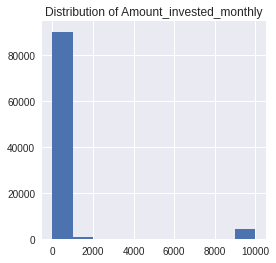

In [ ]:
plt.figure(figsize=(4,4))
df_clean['Amount_invested_monthly'].hist()
plt.title('Distribution of Amount_invested_monthly');

In [ ]:
df_clean['Amount_invested_monthly'].describe([0.01,.25, .5, .75,0.95,0.96])

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
1%          16.832606
25%         74.534002
50%        135.925682
75%        265.731733
95%       1149.405785
96%      10000.000000
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [ ]:
df_clean=impute_num(df_clean,'Amount_invested_monthly')

# of missing values in Amount_invested_monthly after step 1 is 4479
# of missing values in Amount_invested_monthly after step 2 (bfill) is 612
# of missing values in Amount_invested_monthly after step 2 (ffill) is 0


**Changed_Credit_Limit**

* This features has negatives values. Since it is a change in credit limit, negative values are expected.

In [ ]:
df_clean['Changed_Credit_Limit'].describe([0.01,.25, .5, .75,0.95,0.99])

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
1%          -1.540000
25%          5.320000
50%          9.400000
75%         14.870000
95%         23.600000
99%         28.810000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
df_clean=impute_num(df_clean,'Changed_Credit_Limit')

# of missing values in Changed_Credit_Limit after step 1 is 2091
# of missing values in Changed_Credit_Limit after step 2 (bfill) is 260
# of missing values in Changed_Credit_Limit after step 2 (ffill) is 0


**Monthly_Balance**

* The above functions for imputation cannnot be used for `Monthly_Balance` since there are customer ids for which each entry is nan. This is confirmed by the code below in the next cell.
* We decided to remove the rows for `Monthly_Balance` that have missing values.

In [ ]:
dic=dict()#contains the groups of cutomers where each entry is nan
num_column='Monthly_Balance'
unique_customers=df_clean['Customer_ID'].unique()
customers_na=[]
for customer in unique_customers:
  mask=df_clean['Customer_ID']==customer
  number_nas=df_clean.loc[mask,num_column].isna().sum()
  if number_nas==8:
    customers_na.append(customer)
if len(customers_na)>0:
  print('There are customers group where all entries are nan')
  dic[num_column]=customers_na
else:
  print('Passed the test')


There are customers group where all entries are nan


In [ ]:
print(f"There are {len(dic[num_column])} customer groups where all entries are nan")
print('One example of such customer is "CUS_0xb3d7"')
mask=df_clean['Customer_ID']=='CUS_0xb3d7'
df_clean.loc[mask,['Customer_ID',num_column]]

There are 212 customer groups where all entries are nan
One example of such customer is "CUS_0xb3d7"


,Customer_ID,Monthly_Balance
98304,CUS_0xb3d7,NaN
98305,CUS_0xb3d7,NaN
98306,CUS_0xb3d7,NaN
98307,CUS_0xb3d7,NaN
98308,CUS_0xb3d7,NaN
98309,CUS_0xb3d7,NaN
98310,CUS_0xb3d7,NaN
98311,CUS_0xb3d7,NaN


In [ ]:
#Remove the rows for Monthly_Balance` that have missing values.
df_clean=df_clean.dropna(subset=['Monthly_Balance'],axis=0)

**Credit_History_Age**
* The imputation of the missing values in `Credit_History_Age` within a customer_ID group. Note that the values of `Credit_History_Age` must be consecutive.
* To accomplish this task we create two functions: 
  * **next_row**. This function replaces Nan values
  with the value from the next row subtracted by 1.
  * **previous row**. This function replaces Nan values with the values from the previous row added by one.
* We will be using these functions in 2 steps.
  * **Step 1:**: use next row.
  * **Step 2:** use previous row

In [ ]:
def next_row(data,column):
  '''This function imputes the Nan value with the value from the next row'''
  for i in range(len(data[column])-2,-1,-1):
    if math.isnan(data[column].iloc[i]) and not math.isnan(data[column].iloc[i+1]):
      data[column].iloc[i]=data[column].iloc[i+1]-1
  return data
def previous_row(data,column):
  '''This function imputes Nan values with the value from the previous row'''
  for i in range(len(data[column])-1):
    if not math.isnan(data[column].iloc[i]) and  math.isnan(data[column].iloc[i+1]):
      data[column].iloc[i+1]=data[column].iloc[i]+1
  return data


* Impute the missing values.

In [ ]:
#Step 1
indices=df_clean['Credit_History_Age'].isna()
cust_ids=df_clean.loc[indices]['Customer_ID'].values
cust_ids=np.unique(cust_ids)
for cust in cust_ids:
  mask=df_clean['Customer_ID']==cust
  df_clean.loc[mask,'Credit_History_Age']=next_row(df_clean.loc[mask],'Credit_History_Age')

print(f'# of missing values in Credit_History_Age after step 1 \
is {df_clean.Credit_History_Age.isna().sum()}')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# of missing values in Credit_History_Age after step 1 is 1203


In [ ]:
#Step 2
indices=df_clean['Credit_History_Age'].isna()
cust_ids=df_clean.loc[indices]['Customer_ID'].values
cust_ids=np.unique(cust_ids)
for cust in cust_ids:
  mask=df_clean['Customer_ID']==cust
  df_clean.loc[mask,'Credit_History_Age']=previous_row(df_clean.loc[mask],'Credit_History_Age')

print(f'# of missing values in Credit_History_Age after step 2 \
is {df_clean.Credit_History_Age.isna().sum()}')

# of missing values in Credit_History_Age after step 2 is 0


### Dealing with unusual features

**Age**

* The column `Age` has extraneous values (max value=8698). Also, some records have negative age values (min value=-500). This is confirmed below.

In [ ]:
df_clean['Age'].describe([0.01,0.25,0.50,0.75,0.95,0.98])

count    97132.000000
mean       110.649601
std        686.430590
min       -500.000000
1%          14.000000
25%         24.000000
50%         33.000000
75%         42.000000
95%         53.000000
98%         56.000000
max       8698.000000
Name: Age, dtype: float64

* Age values that are negative or larger than 60 will be considered extraneous. We will replace these values with Nan and then impute them using the function `impute_num`

In [ ]:

lower_bound=0
upper_bound=60
df_clean['Age']=df_clean['Age'].apply(lambda x: np.nan if x<lower_bound or x>upper_bound else x)

In [ ]:
df_clean=impute_num(df_clean,'Age')

# of missing values in Age after step 1 is 2712
# of missing values in Age after step 2 (bfill) is 324
# of missing values in Age after step 2 (ffill) is 0


**Num_Bank_Account**
* This feature has negative values (positive are expected). The values that are less than 0 or larger than 450 will be considered extraneous. We will replace these values by nan and then impute them.

In [ ]:
df_clean['Num_Bank_Accounts'].describe([0.01,0.25,0.75,0.95,0.99])

count    97132.000000
mean        17.153636
std        117.866171
min         -1.000000
1%           0.000000
25%          3.000000
50%          6.000000
75%          7.000000
95%         10.000000
99%        449.690000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [ ]:
lower_bound=0
upper_bound=450
df_clean['Num_Bank_Accounts']=df_clean['Num_Bank_Accounts'].apply(lambda x: np.nan if x<lower_bound or x>upper_bound else x)

In [ ]:
df_clean=impute_num(df_clean,'Num_Bank_Accounts')

# of missing values in Num_Bank_Accounts after step 1 is 992
# of missing values in Num_Bank_Accounts after step 2 (bfill) is 147
# of missing values in Num_Bank_Accounts after step 2 (ffill) is 0


**Num_of_Loan**
* This feature has negatives values (min=-100) but positive values were expected. Also, it has extremely high values (max=1496 but 99% percentile=9)
* The values that are negative or larger than 9 will be considered extraneous and will be replaced by Nan and then will be imputed.


In [ ]:
df_clean['Num_of_Loan'].describe([0.01,0.25,0.75,0.95,0.99])

count    97132.000000
mean         2.950428
std         62.428929
min       -100.000000
1%        -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
95%          8.000000
99%          9.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [ ]:
lower_bound=0
upper_bound=9
df_clean['Num_of_Loan']=df_clean['Num_of_Loan'].apply(lambda x: np.nan if x<lower_bound or x>upper_bound else x)

In [ ]:
df_clean=impute_num(df_clean,'Num_of_Loan')

# of missing values in Num_of_Loan after step 1 is 4219
# of missing values in Num_of_Loan after step 2 (bfill) is 584
# of missing values in Num_of_Loan after step 2 (ffill) is 0


**Delay_from_due_date**
* This feature has negative values (min=-5) but positive were expected. The negative values will be replaced by Nan and will be imputed.

In [ ]:
df_clean['Delay_from_due_date'].describe([0.01,0.25,0.75,0.95,0.99])

count    97132.000000
mean        21.034788
std         14.856056
min         -5.000000
1%           0.000000
25%         10.000000
50%         18.000000
75%         28.000000
95%         54.000000
99%         61.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [ ]:
lower_bound=0
df_clean['Delay_from_due_date']=df_clean['Delay_from_due_date'].apply(lambda x: np.nan if x<lower_bound  else x)

In [ ]:
df_clean=impute_num(df_clean,'Delay_from_due_date')

# of missing values in Delay_from_due_date after step 1 is 573
# of missing values in Delay_from_due_date after step 2 (bfill) is 93
# of missing values in Delay_from_due_date after step 2 (ffill) is 0


**Num_Credit_Card**
* The values larger than 849 will be considered extraneous and will be replaced by NaN and then
they will be imputed.

In [ ]:
df_clean['Num_Credit_Card'].describe([0.01,0.25,0.75,0.95,0.99])

count    97132.000000
mean        22.457058
std        129.030525
min          0.000000
1%           1.000000
25%          4.000000
50%          5.000000
75%          7.000000
95%         10.000000
99%        848.690000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

In [ ]:
upper_bound=849
df_clean['Num_Credit_Card']=df_clean['Num_Credit_Card'].apply(lambda x: np.nan if x>upper_bound  else x)

In [ ]:
df_clean=impute_num(df_clean,'Num_Credit_Card')

# of missing values in Num_Credit_Card after step 1 is 964
# of missing values in Num_Credit_Card after step 2 (bfill) is 134
# of missing values in Num_Credit_Card after step 2 (ffill) is 0


**Interest_Rate**
* The values that are large than 124 will be considered extraneous andwill be replaced by Nan and then they will be imputed.

In [ ]:
df_clean['Interest_Rate'].describe([0.01,0.25,0.75,0.95,0.97,0.98,0.99])

count    97132.000000
mean        72.334112
std        465.600171
min          1.000000
1%           1.000000
25%          8.000000
50%         13.000000
75%         20.000000
95%         33.000000
97%         34.000000
98%        123.040000
99%       2845.210000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [ ]:
upper_bound=124
df_clean['Interest_Rate']=df_clean['Interest_Rate'].apply(lambda x: np.nan if x>upper_bound  else x)

In [ ]:
df_clean=impute_num(df_clean,'Interest_Rate')

# of missing values in Interest_Rate after step 1 is 1943
# of missing values in Interest_Rate after step 2 (bfill) is 258
# of missing values in Interest_Rate after step 2 (ffill) is 0


In [ ]:
#df_clean.to_csv('clean_data',index=False)

In [ ]:
df_clean.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Data Transformation

In [ ]:
#df_clean=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_data')

**Payment_Behaviour**
* This feature describes spending behaviour of the customer and and paying behaviour.
* The unique values of the behaviour are: Low_spent_Small_value_payments, High_spent_Medium_value_payments    
Low_spent_Medium_value_payments     
High_spent_Large_value_payments     
High_spent_Small_value_payments     
Low_spent_Large_value_payments 
* We want to describe each behaviour separately: 
  * We will create one column called Spend for spending behaviour (with values Low, High) and another called Pay for paying behaviour (with values, Small, Medium, Large)

In [ ]:
df_clean['Spend']=df_clean['Payment_Behaviour'].str.split('_').str[0]
df_clean['Pay']=df_clean['Payment_Behaviour'].str.split('_').str[2]


**Type_of_Loan**
* The column `Type_of_Loan` contains the loans that each customer has been given.
* Extract all the loans from `Type_of_Loan`. For each such loan create a separate column.

In [ ]:
#Extract all the loans
loans=set()
for element in df_clean['Type_of_Loan']:
  try:#
      for loan in element.split(','):
        if 'and ' not in loan.strip():
          loans.add(loan.strip())
        else:
          loans.add(loan.split('and ')[1].strip())
  except:
    pass

print('The different types of loans are:\n ')
for loan in loans:
  print(loan)

The different types of loans are:
 
Mortgage Loan
Payday Loan
Credit-Builder Loan
Personal Loan
Student Loan
Debt Consolidation Loan
Home Equity Loan
Auto Loan
Not Specified


In [ ]:
#For each loan create a column indicating whether the corresponding person
#got such loan or not. 1-->True, 0-->False
for loan in loans:
  df_clean[loan]=df_clean['Type_of_Loan'].str.contains(loan).map({False:0,True:1})

In [ ]:
#Check the new columns just created.
df_clean[list(loans)].sample(5)

,Mortgage Loan,Payday Loan,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Not Specified
46659,0,0,0,0,0,1,0,0,0
80657,1,0,0,0,0,0,0,1,0
82251,1,0,1,0,0,0,0,0,0
95661,0,1,0,0,0,0,1,0,1
47023,0,0,0,0,0,0,0,0,1


In [ ]:
#Drop Payment_Behaviour, Type_of_Loan
df_clean=df_clean.drop(columns=['Payment_Behaviour','Type_of_Loan'])

**Credit_Score**
* Our target `Credit_Score` has thre unique values: Poor,Standard, Good. We will transform this variable according to the following rule:
Poor-->0, Standard-->1, Good-->2
    
        

In [ ]:
#Transform Credit_Score
df_clean['Credit_Score']=df_clean['Credit_Score'].map({'Poor':0,
                                                       'Standard':1,
                                                       'Good':2})

### Feature Engineering

* Define the target variable and the features (data)
* Split the data in train and test set based on Customer_ID
* We will create a function call `load data` to accomplish this task.
* After applying our function we get: X_train,X_test,y_train,y_test.
* Finally we get X_train_num (training set with numerical features), X_train_cat (training set with categorical features) and X_test_num, X_test_cat

In [ ]:
target=df_clean[['Customer_ID','Credit_Score']] #we keep Cutomers Id for the moment
data=df_clean.drop(columns=['Credit_Score'])

In [ ]:
def load_data(data,target,train_size=0.8,seed=123):
  unique_vals=data['Customer_ID'].unique()#unique customers ids
  df_cust=pd.DataFrame(unique_vals,columns=['Unique_Customers'])#dataframe with 
  #unique customers
  train=df_cust.sample(frac=train_size,random_state=seed)
  train_indices=train.set_index('Unique_Customers').index
  train_indices=set(train_indices) #want to take advantage of the set operations
  test_indices=set(unique_vals).difference(train_indices)
  data_train=data.set_index('Customer_ID').loc[train_indices]
  data_test=data.set_index('Customer_ID').loc[test_indices]
  target_train=target.set_index('Customer_ID').loc[train_indices]
  target_test=target.set_index('Customer_ID').loc[test_indices]
  return data_train,data_test,target_train,target_test

* Use 60% for training set and 40% for test set.

In [ ]:
#split the data in train and test
train_size=0.6
seed=123
X_train,X_test,y_train,y_test=load_data(data,
                                        target,
                                        train_size=train_size,
                                        seed=seed)

* Let's drop `Customer_ID` now

In [ ]:
X_train=X_train.reset_index('Customer_ID').drop(columns=['Customer_ID'])
X_test=X_test.reset_index('Customer_ID').drop(columns=['Customer_ID'])
y_train=y_train.reset_index('Customer_ID').drop(columns=['Customer_ID'])
y_test=y_test.reset_index('Customer_ID').drop(columns=['Customer_ID'])

In [ ]:
#Get numerical training and test set and categorical training and test set
X_train_num=X_train.select_dtypes(exclude='object')#returns dataframe
X_train_cat=X_train.select_dtypes(include='object')#returns dataframe
X_test_num=X_test.select_dtypes(exclude='object')#returns dataframe
X_test_cat=X_test.select_dtypes(include='object')#returns dataframe

* We treat the features `Month`, `Spend` and `Pay` as ordinal features and the other ones as nominal.
* We create the dataframes X_train_cat_ord, X_test_cat_ord which has only ordinal features.Then we create the dataframes X_train_cat_nom X_test_cat_nom which has only nominal features.
* Apply OrdinalEncoder for ordinal features and OneHotEncoder for nominal features.

In [ ]:
ordinal_features=['Month','Spend','Pay','Credit_Mix']
nominal_features=['Occupation','Payment_of_Min_Amount']
X_train_cat_ord=X_train_cat[ordinal_features]
X_train_cat_nom=X_train_cat[nominal_features]
X_test_cat_ord=X_test_cat[ordinal_features]
X_test_cat_nom=X_test_cat[nominal_features]


* Transform the ordinal features

In [ ]:
oe=OrdinalEncoder(categories=[
    ['January','February','March','April','May','June','July','August'],
    ['Low','High'],
    ['Small','Medium','Large'],
    ['Bad','Standard','Good']])
X_train_cat_ord=oe.fit_transform(X_train_cat_ord)#returns array
X_test_cat_ord=oe.transform(X_test_cat_ord)#returns array


* Transform the nominal features

In [ ]:
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
X_train_cat_nom=ohe.fit_transform(X_train_cat_nom)#returns array
X_test_cat_nom=ohe.transform(X_test_cat_nom)#returns array

* Combine the X_train_cat_ord and X_train_cat_nom into X_train_cat
* Then combine X_test_cat_ord and X_test_cat_nom into X_test_cat


In [ ]:
X_train_cat=np.append(X_train_cat_ord,X_train_cat_nom,axis=1)
X_test_cat=np.append(X_test_cat_ord,X_test_cat_nom,axis=1)

* Combine X_train_num and X_train_cat to get X_train.
* Combine X_test_num and X_train_cat to get X_teste 
* Turn the dataframe y_train into  y_train array and y_test dataframe into y_test array

In [ ]:
X_train=np.append(X_train_num.values,X_train_cat,axis=1)
X_test=np.append(X_test_num.values,X_test_cat,axis=1)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

### Models
* RandomForest 
* XGBoost
* Use GridSearchCV or RandomsearchCV for hyperparameter tuning.
* We treat our problem as a classification problem. Although it can be treated as regression problem as well.

**RandomForestClassifier**
* Try a basic random forest model without hyperparameter tuning.
* The parameter class_weight(below) is set to 'balanced' that helps us deal with class imbalance. The formula for computing the weights is given by $$\text{weights}=\frac{\text{total observations}}{\text{number of classes}*\text{observations in class}}$$

In [ ]:
#basic model
seed=123
rf=RandomForestClassifier(ccp_alpha=0,
                          max_depth=20,
                          min_samples_split=5,
                          n_estimators=200,
                          class_weight='balanced',#taking into a ccount unbalanced data
                          oob_score=True,#out of bag score
                          random_state=seed)



In [ ]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_train)
training_score=accuracy_score(y_train,y_pred,normalize=True)
print(f'The training accuracy_score is {training_score}')

The training accuracy_score is 0.9128525355108763


* One way to estimate the generalization error is to use out of bag score (we passed the parameter oob_score=True). This accuracy score is computed in each iteration during the bagging process on the observations which did not particiapte during the fitting process.

In [ ]:
print(f'The out of bage score is {rf.oob_score_}')

The out of bage score is 0.8078467028065601


* Compute the cross-validation score with cv=5

In [ ]:
scores=cross_val_score(estimator=rf,
                       X=X_train,
                       y=y_train,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
print(f'CV accracy scores:{scores}')
print(f'CV_accuracy {np.mean(scores):.3f} +/-{np.std(scores):.3f}')


CV accracy scores:[0.688481   0.67450039 0.69385829 0.69883342 0.69016984]
CV_accuracy 0.689 +/-0.008


**Conclusion.** The fact that the training accuracy is larger than out of bag scoreand CV accuracy suggests that we use a hyperparameter tuning.

* RandomizedSearchCV (GridSearCV takes time!)  for RandomForestClassifier

In [ ]:
param_grid=[{'criterion':['gini','entropy'],  #Specify the param grid for GridSearchCV
             'max_depth':range(25,35,5),
             'n_estimators':range(350,500,50),
             'min_samples_leaf':range(1,5)}]

In [ ]:
rf=RandomForestClassifier(class_weight='balanced',#helps to deal with imbalanced data
                          random_state=seed,
                          )#our estimator

In [ ]:
rs=RandomizedSearchCV(estimator=rf,
                param_distributions=param_grid,
                scoring='accuracy',
                refit=True,
                cv=3,
                n_iter=5,
                n_jobs=-1,
                random_state=seed)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=123),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(25, 35, 5),
                                         'min_samples_leaf': range(1, 5),
                                         'n_estimators': range(350, 500, 50)}],
                   random_state=123, scoring='accuracy')

In [ ]:
print(f'The best parameters are {rs.best_params_}')
print("*********")
print(f"The best CV score is {rs.best_score_} ")

The best parameters are {'n_estimators': 450, 'min_samples_leaf': 1, 'max_depth': 25, 'criterion': 'entropy'}
*********
The best CV score is 0.6930281926540035 


In [ ]:
#Training score
y_pred_train=rs.predict(X_train)
training_accuracy=accuracy_score(y_train,y_pred)
print(f'The training accuracy is {training_accuracy}')

The training accuracy is 0.9128525355108763


**Comment.** Just looking at the training accuracy,cv accuracy and the best params, one way to possibly imporve the performance of the model is to increasy n_estimators even further.

* Evalaute the performance of the model on the test set using different metrics such as recall, precision, accuracy and f1 score.

In [ ]:
y_pred_test=rs.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69     11047
           1       0.76      0.73      0.75     20710
           2       0.58      0.72      0.64      7083

    accuracy                           0.71     38840
   macro avg       0.69      0.71      0.69     38840
weighted avg       0.72      0.71      0.71     38840



* Let's take a look at the confusion marix

[[ 7305  2818   924]
 [ 2676 15217  2817]
 [   92  1898  5093]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 288x288 with 0 Axes>

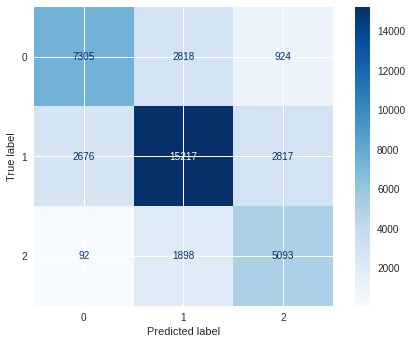

In [ ]:
plt.figure(figsize=(4,4))
print(confusion_matrix(y_test,y_pred_test))
plot_confusion_matrix(rs,X_test,y_test,cmap='Blues')

**Conclusion.** The model does better at predicting the majority class (class=1). Among the minority classes (class=0, class=2), the model does better at predicting class=2. To improve our model we could manually manupulate class_weights via GridSearchCV/RandomSearchCV.

In [ ]:
#import joblib
#filename = '/content/drive/MyDrive/Colab Notebooks/rs_model.sav'
#joblib.dump(rs, filename)

['/content/drive/MyDrive/Colab Notebooks/rs_model.sav']

**XGBoost**
* We were planing to explore a wider range of parameters via RandomSearCV. But due to very time-consuming execution of this model we restricted ourselves only to very small set of parameters.

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

In [ ]:
seed=123
model=xgb.XGBClassifier(booster='gbtree',
                        sample_weight=classes_weights,
                        objective='multi:softprob',eval_metric='mlogloss',seed=seed)


In [ ]:
param_grid=[{'max_depth':[25],
            'reg_alpha': [2],
            'reg_lambda':[2],
            'n_estimators':[500]}]

In [ ]:
random_xgb=RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              n_iter=1,
                              scoring='accuracy',
                              cv=3,
                              refit=True,
                              n_jobs=-1,
                              random_state=seed)
random_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(eval_metric='mlogloss',
                                           objective='multi:softprob',
                                           sample_weight=array([0.62878347, 0.62878347, 0.62878347, ..., 0.62878347, 0.62878347,
       0.62878347]),
                                           seed=123),
                   n_iter=1, n_jobs=-1,
                   param_distributions=[{'max_depth': [25],
                                         'n_estimators': [500],
                                         'reg_alpha': [2], 'reg_lambda': [2]}],
                   random_state=123, scoring='accuracy')

In [ ]:
#filename = '/content/drive/MyDrive/Colab Notebooks/random_xgb.sav'
#joblib.dump(random_xgb, filename)

['/content/drive/MyDrive/Colab Notebooks/random_xgb.sav']

In [ ]:
print(f'The best parameters are {random_xgb.best_params_}')#nothing new

The best parameters are {'reg_lambda': 2, 'reg_alpha': 2, 'n_estimators': 500, 'max_depth': 25}


* Measuring the performance of the model via recall, precision, accuracy and f1 score.

In [ ]:
y_pred_test_xgb=random_xgb.predict(X_test)
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68     11047
           1       0.72      0.76      0.74     20710
           2       0.60      0.57      0.59      7083

    accuracy                           0.70     38840
   macro avg       0.68      0.66      0.67     38840
weighted avg       0.70      0.70      0.70     38840



[[ 7298  3129   620]
 [ 2962 15716  2032]
 [  168  2855  4060]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


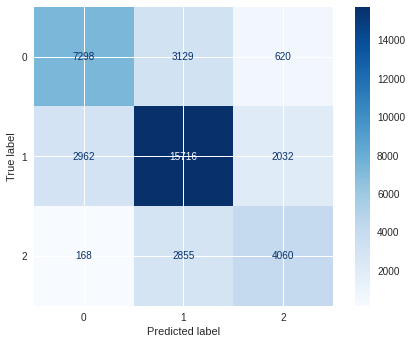

In [ ]:
print(confusion_matrix(y_test,y_pred_test_xgb))
plot_confusion_matrix(random_xgb,X_test,y_test,cmap='Blues')

<Figure size 864x864 with 0 Axes>

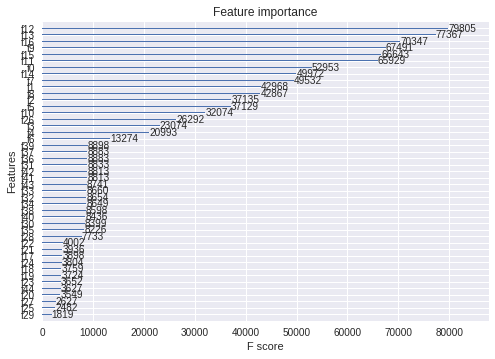

In [ ]:
plt.figure(figsize=(12,12))
xgb.plot_importance(random_xgb.best_estimator_);

**Conclusion.** It seems that RandomForest does a better job. For example, RamdomForest has higher recall for the minority class=2. Maybe a better hyperparameter tuning would lead to better results.

### Future Steps:
* We could consider manipulating the weights of our classes via more efficient hyperparamter search using HalvingRandomSearchCV or GridSearchCV with nested cross-validation. A popular library for hyperparameter optimization is hyperopt.
* We could also implement Stacking Classifier approach.
* Implement some techniques for imbalanced data such as upsampling or downsampling.
* We can treat our problem as a regression problem and use for example RandomForestRegressor or XGBCRegressor or Linear Regression.
* Improving the feature engineering part may lead to better results.
